### Potential tools:
#### 1. win32evtlog with multiple codes: https://github.com/Kalashnikov-cmd/Critical-Event-ID-Detector/blob/main/expidlog.py
#### 2. syslog2: https://github.com/andy-maier/syslog2/tree/master
#### 3. Custom solve: https://orcinus.ru/blog/2020-01-21
#### 4. !!! pywin32: https://www.iditect.com/faq/python/how-to-use-win32-api-with-python.html

In [5]:
# pywin32, winreg, win32evtlog ... already satisfied
# !pip install pywin32


In [6]:
# Weak code from: https://github.com/djakubas/WinEventViewerLib/blob/main/WinEventViewerLib.py
from win32evtlog import EVENTLOG_SEQUENTIAL_READ, EVENTLOG_FORWARDS_READ,EVENTLOG_INFORMATION_TYPE,EVENTLOG_ERROR_TYPE,EVENTLOG_WARNING_TYPE,ReadEventLog,OpenEventLog,CloseEventLog,GetNumberOfEventLogRecords
from win32evtlogutil import AddSourceToRegistry, ReportEvent,RemoveSourceFromRegistry

def Register_Event_Source(source_name, log_type='Application'):
    #Register a new event source in Windows Registry

    try:
        AddSourceToRegistry(source_name,None,log_type)
        return True
    except:
        return False

def Remove_Event_Source(source_name,log_type='Application'):
    #Removes an event source from Windows Registry
    try:
        RemoveSourceFromRegistry(source_name,log_type)
        return True
    except:
        return False

def Get_Total_Logs(server='localhost', log_type='Application'):
    log_handle = OpenEventLog(server, log_type)
    total = GetNumberOfEventLogRecords(log_handle)
    CloseEventLog(log_handle)
    return total

def Get_Event_Logs(server='localhost', log_type='Application'):
    #Get events from WinEventViewer
    log_handle = OpenEventLog(server, log_type)

    flags = EVENTLOG_FORWARDS_READ | EVENTLOG_SEQUENTIAL_READ
    events = []

    while True:
        records = ReadEventLog(log_handle, flags, 0)
        if not records:
            break
        for record in records:
            event = {
                'EventID': record.EventID,
                'ComputerName': record.ComputerName,
                'SourceName': record.SourceName,
                'TimeGenerated': record.TimeGenerated.Format(),
                'EventCategory': record.EventCategory,
                'EventType': record.EventType,
                'EventData': record.StringInserts
            }
            events.append(event)

    CloseEventLog(log_handle)

    return events

def Print_Event(event):
    #Prints event
    print(f"EventID: {event['EventID']}")
    print(f"ComputerName: {event['ComputerName']}")
    print(f"SourceName: {event['SourceName']}")
    print(f"TimeGenerated: {event['TimeGenerated']}")
    print(f"EventCategory: {event['EventCategory']}")
    print(f"EventType: {event['EventType']}")
    if event['EventData']:
        for i, data in enumerate(event['EventData']):
            print(f"EventData[{i}]: {data}")
    print('-' * 40)

def Write_Event(source_name, event_id=0, event_type=EVENTLOG_INFORMATION_TYPE, category=0, data=None):
    # Write an event to WinEventViewer
    try:
        ReportEvent(source_name,event_id,category,event_type,data)
        return True
    except:
        return False

In [27]:
# get all system events (how to get only "Hardware Events")
events = Get_Event_Logs(server='localhost', log_type='System')

In [28]:
# Print sources
set([e["SourceName"] for e in events])

{'Application Popup',
 'DCOM',
 'Disk',
 'EventLog',
 'Lfsvc',
 'LsaSrv',
 'Microsoft-Windows-DHCPv6-Client',
 'Microsoft-Windows-DNS-Client',
 'Microsoft-Windows-Dhcp-Client',
 'Microsoft-Windows-Directory-Services-SAM',
 'Microsoft-Windows-Eventlog',
 'Microsoft-Windows-FilterManager',
 'Microsoft-Windows-GroupPolicy',
 'Microsoft-Windows-Iphlpsvc',
 'Microsoft-Windows-Kernel-Boot',
 'Microsoft-Windows-Kernel-General',
 'Microsoft-Windows-Kernel-Power',
 'Microsoft-Windows-Kernel-Processor-Power',
 'Microsoft-Windows-Ntfs',
 'Microsoft-Windows-TPM-WMI',
 'Microsoft-Windows-TerminalServices-TSFairShare-Events',
 'Microsoft-Windows-Time-Service',
 'Microsoft-Windows-WHEA-Logger',
 'Microsoft-Windows-WindowsUpdateClient',
 'Microsoft-Windows-Wininit',
 'Microsoft-Windows-Winlogon',
 'NETLOGON',
 'Schannel',
 'Service Control Manager',
 'TPM',
 'TermServLicensing',
 'TermService',
 'User32',
 'WinRM',
 'e1dexpress'}

In [29]:
len(events)

32308

In [23]:
# Print only disk events
[e for e in events if e["SourceName"] == "Disk"]

[{'EventID': -1073479673,
  'ComputerName': 'Sultan.mlab.cs.msu.su',
  'SourceName': 'Disk',
  'TimeGenerated': 'Sun Sep  1 16:34:05 2024',
  'EventCategory': 0,
  'EventType': 1,
  'EventData': ('\\Device\\Harddisk2\\DR2',)},
 {'EventID': -1073479673,
  'ComputerName': 'Sultan.mlab.cs.msu.su',
  'SourceName': 'Disk',
  'TimeGenerated': 'Sun Sep  1 16:34:05 2024',
  'EventCategory': 0,
  'EventType': 1,
  'EventData': ('\\Device\\Harddisk2\\DR2',)},
 {'EventID': -1073479673,
  'ComputerName': 'Sultan.mlab.cs.msu.su',
  'SourceName': 'Disk',
  'TimeGenerated': 'Sun Sep  1 16:34:05 2024',
  'EventCategory': 0,
  'EventType': 1,
  'EventData': ('\\Device\\Harddisk2\\DR2',)},
 {'EventID': -1073479673,
  'ComputerName': 'Sultan.mlab.cs.msu.su',
  'SourceName': 'Disk',
  'TimeGenerated': 'Sun Sep  1 16:34:05 2024',
  'EventCategory': 0,
  'EventType': 1,
  'EventData': ('\\Device\\Harddisk2\\DR2',)},
 {'EventID': -1073479673,
  'ComputerName': 'Sultan.mlab.cs.msu.su',
  'SourceName': 'Disk',

In [ ]:
{e for e in events if e["SourceName"] == "Disk"}

### Description of EventType: 
#### 1. https://learn.microsoft.com/en-us/windows/win32/api/winbase/nf-winbase-reporteventa
#### 2. http://www.delphikingdom.com/asp/viewitem.asp?catalogid=530

\begin{array}{|c|c|} \hline
Value & Meaning \\  \hline
EVENTLOG\_SUCCESS~0x0000 & Information~event \\
EVENTLOG\_AUDIT\_FAILURE~0x0010 & Failure~Audit~event \\
EVENTLOG\_AUDIT\_SUCCESS~0x0008 & Success~Audit~event \\
EVENTLOG\_ERROR\_TYPE~0x0001 & Error~event \\
EVENTLOG\_INFORMATION\_TYPE~0x0004 & Information~event \\
EVENTLOG\_WARNING\_TYPE~0x0002 & Warning~event \\ \hline
\end{array}

In [62]:
OpenEventLog

<function win32evtlog.OpenEventLog>

In [59]:
from win32evtlog import EVENTLOG_SEQUENTIAL_READ, EVENTLOG_FORWARDS_READ,EVENTLOG_INFORMATION_TYPE,EVENTLOG_ERROR_TYPE,EVENTLOG_WARNING_TYPE
from win32evtlog import ReadEventLog,OpenEventLog,CloseEventLog,GetNumberOfEventLogRecords
import csv

def Get_Event_Logs(server='localhost', log_type='Application'):
    #Get events from WinEventViewer
    log_handle = OpenEventLog(server, log_type)

    flags = EVENTLOG_FORWARDS_READ | EVENTLOG_SEQUENTIAL_READ
    events = []

    while True:
        records = ReadEventLog(log_handle, flags, 0)
        if not records:
            break
        for record in records:
            event = {
                'EventID': record.EventID,
                'ComputerName': record.ComputerName,
                'SourceName': record.SourceName,
                'TimeGenerated': record.TimeGenerated.Format(),
                'EventCategory': record.EventCategory,
                'EventType': record.EventType,
                'EventData': record.StringInserts,
                'Viewer': log_type
            }
            events.append(event)

    CloseEventLog(log_handle)
    return events

events = Get_Event_Logs(server='localhost', log_type='System')
with open('./events.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=list(events[0].keys()))
    writer.writeheader()
    for e in events:
        writer.writerow(e)

In [60]:
import pandas as pd

df = pd.read_csv('./events.csv')

In [61]:
df

,EventID,ComputerName,SourceName,TimeGenerated,EventCategory,EventType,EventData
0,17,Sultan.mlab.cs.msu.su,Microsoft-Windows-WHEA-Logger,Sat Aug 31 10:21:56 2024,0,2,"('4', '{00000000-0000-0000-0000-000000000000}'..."
1,17,Sultan.mlab.cs.msu.su,Microsoft-Windows-WHEA-Logger,Sat Aug 31 10:22:00 2024,0,2,"('4', '{00000000-0000-0000-0000-000000000000}'..."
2,17,Sultan.mlab.cs.msu.su,Microsoft-Windows-WHEA-Logger,Sat Aug 31 10:22:04 2024,0,2,"('4', '{00000000-0000-0000-0000-000000000000}'..."
3,1073748860,Sultan.mlab.cs.msu.su,Service Control Manager,Sat Aug 31 10:23:18 2024,0,4,"('Background Intelligent Transfer Service', 'r..."
4,17,Sultan.mlab.cs.msu.su,Microsoft-Windows-WHEA-Logger,Sat Aug 31 10:23:28 2024,0,2,"('4', '{00000000-0000-0000-0000-000000000000}'..."
...,...,...,...,...,...,...,...
32304,1073748860,Sultan.mlab.cs.msu.su,Service Control Manager,Wed Oct 16 18:16:01 2024,0,4,('Google Updater Service (GoogleUpdaterService...
32305,1073748860,Sultan.mlab.cs.msu.su,Service Control Manager,Wed Oct 16 18:16:11 2024,0,4,('Google Updater Internal Service (GoogleUpdat...
32306,1073748860,Sultan.mlab.cs.msu.su,Service Control Manager,Wed Oct 16 18:16:11 2024,0,4,('Google Updater Service (GoogleUpdaterService...
32307,17,Sultan.mlab.cs.msu.su,Microsoft-Windows-WHEA-Logger,Wed Oct 16 18:34:14 2024,0,2,"('4', '{00000000-0000-0000-0000-000000000000}'..."


<Axes: ylabel='Frequency'>

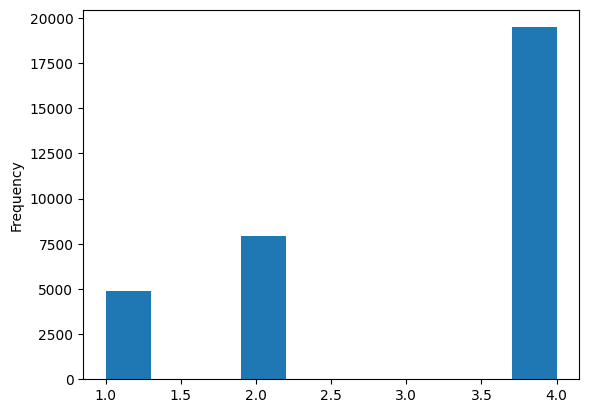

In [56]:
df["EventType"].plot(kind='hist')

In [44]:
df["SourceName"].value_counts()

SourceName
Service Control Manager                                  19082
Microsoft-Windows-WHEA-Logger                             7845
Microsoft-Windows-GroupPolicy                             4541
Microsoft-Windows-WindowsUpdateClient                      197
Schannel                                                   188
TermService                                                106
DCOM                                                        86
Microsoft-Windows-Kernel-General                            78
EventLog                                                    51
Disk                                                        46
Microsoft-Windows-Kernel-Processor-Power                    16
Microsoft-Windows-Winlogon                                  13
Microsoft-Windows-FilterManager                             10
Microsoft-Windows-Kernel-Boot                                9
Microsoft-Windows-Ntfs                                       4
Microsoft-Windows-TPM-WMI                   